In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/adverts.csv')  

In [ ]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
data.shape

(402005, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


## Missing Values 

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [ ]:
data[ data['vehicle_condition']=="NEW" ]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [ ]:
# Replace missing "reg_code" values for "NEW" cars with "NoCode"
data.loc[data['vehicle_condition'] == 'NEW', 'reg_code'] = 'NoCode'

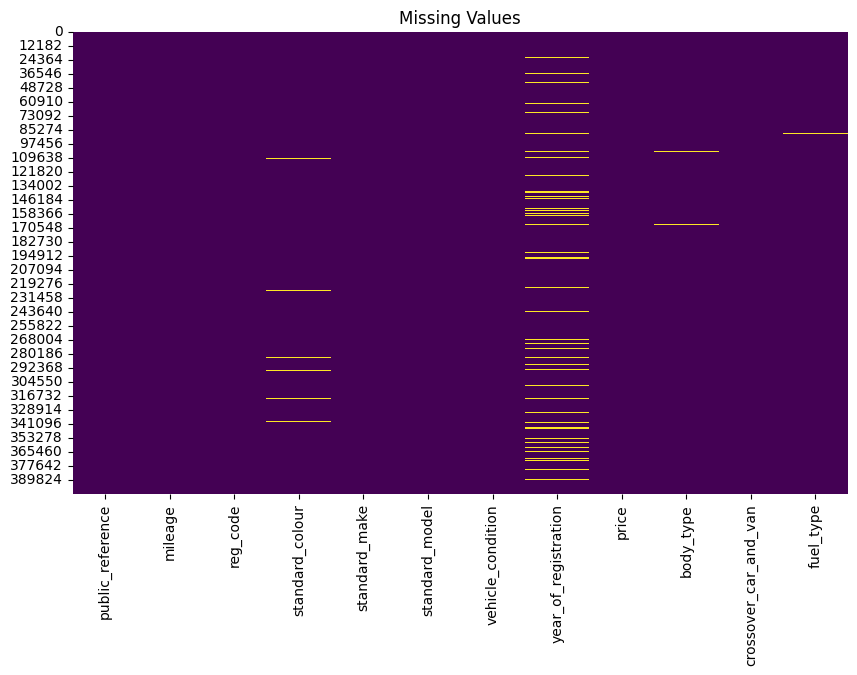

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [ ]:
columns_with_missing_values = ['mileage', 'year_of_registration']

# Create an instance of SimpleImputer with the desired strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the columns with missing values
imputer.fit(data[columns_with_missing_values])

# Transform and replace the missing values in the dataset
data[columns_with_missing_values] = imputer.transform(data[columns_with_missing_values])

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394875 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       394875 non-null  int64  
 1   mileage                394875 non-null  float64
 2   reg_code               394875 non-null  object 
 3   standard_colour        394875 non-null  object 
 4   standard_make          394875 non-null  object 
 5   standard_model         394875 non-null  object 
 6   vehicle_condition      394875 non-null  object 
 7   year_of_registration   394875 non-null  float64
 8   price                  394875 non-null  int64  
 9   body_type              394875 non-null  object 
 10  crossover_car_and_van  394875 non-null  bool   
 11  fuel_type              394875 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 36.5+ MB


In [ ]:
categorical_cols = ['reg_code','standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 
                    'body_type', 'fuel_type', 'crossover_car_and_van']

In [ ]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data['vehicle_condition'].unique()

array([0, 1])

## Outliers in price

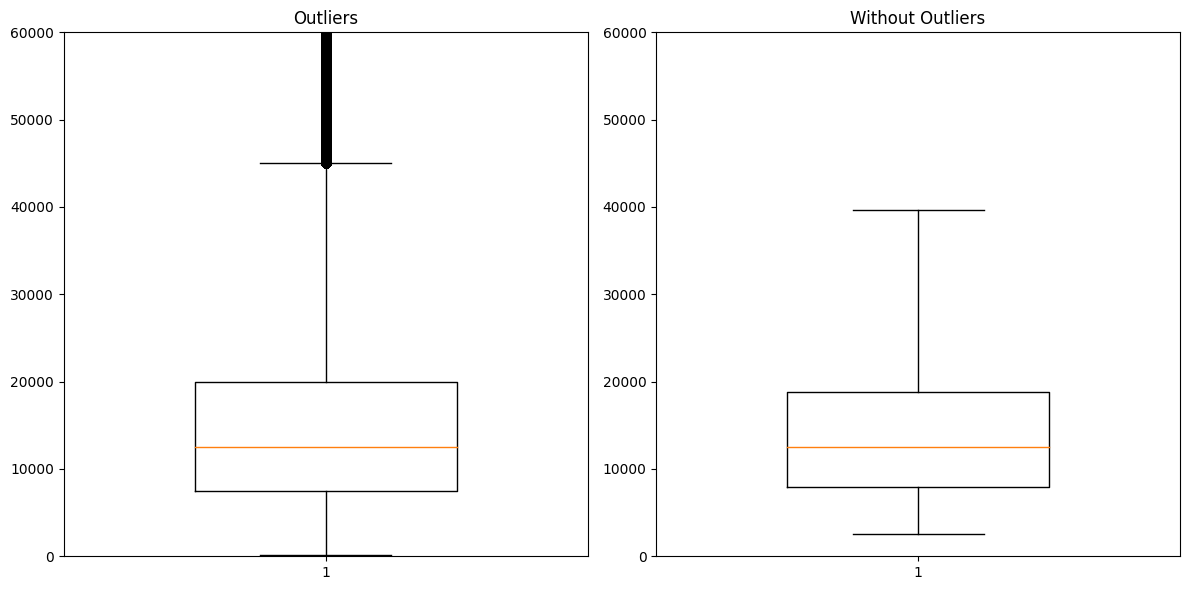

In [ ]:
fig, axs = plt.subplots(1 , 2 ,figsize=(12,6))
axs[0].boxplot(data['price'], widths=0.5, whis=2)
axs[0].set_title('Outliers')
axs[0].set_ylim(0, 60000)  # Set the y-axis limits

data_no_outliers = data[data['price'].between(data['price'].quantile(0.05), data['price'].quantile(0.94))]

axs[1].boxplot(data_no_outliers['price'], widths=0.5, whis=2)
axs[1].set_title('Without Outliers')
axs[1].set_ylim(0, 60000)  # Set the y-axis limits

plt.tight_layout()
plt.show()

In [ ]:
data = data_no_outliers
data.shape

(352257, 12)

## Outliers in year_of_registration

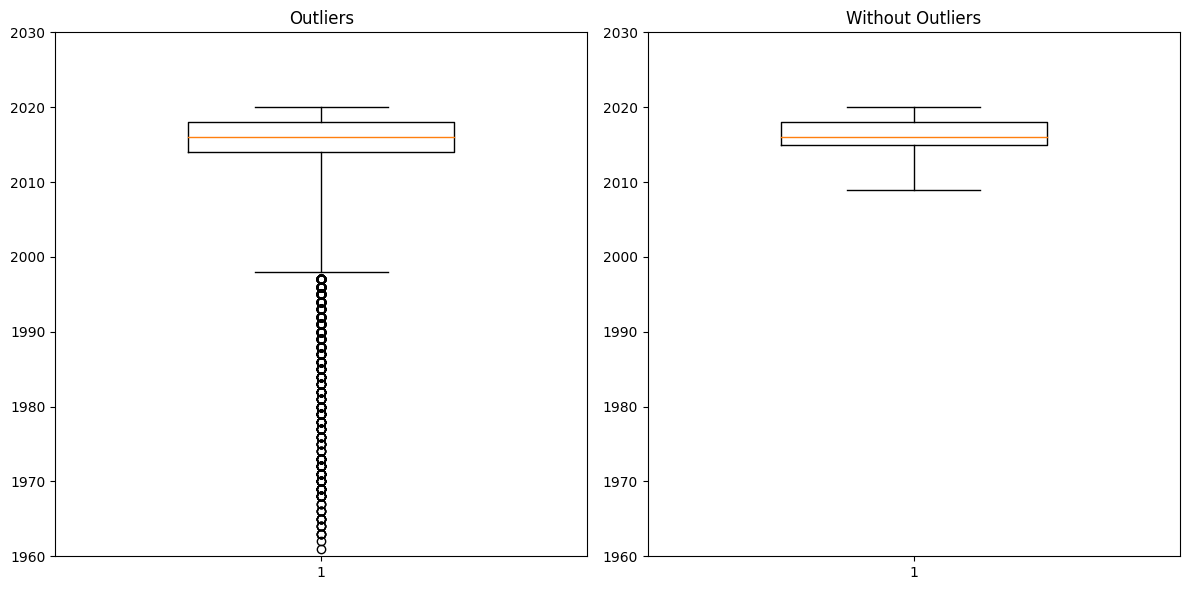

In [ ]:
fig, axs = plt.subplots(1 , 2 ,figsize=(12,6))
axs[0].boxplot(data['year_of_registration'], widths=0.5, whis=4)
axs[0].set_title('Outliers')
axs[0].set_ylim(1960,2030)
data_no_outliers = data[data['year_of_registration'].between(data['year_of_registration'].quantile(0.05), data['year_of_registration'].quantile(0.95))]

axs[1].boxplot(data_no_outliers['year_of_registration'], widths=0.5, whis=2)
axs[1].set_title('Without Outliers')
axs[1].set_ylim(1960,2030)
plt.tight_layout()
plt.show()

In [ ]:
data = data_no_outliers
data.shape

(337142, 12)

## Outliers in Mileage

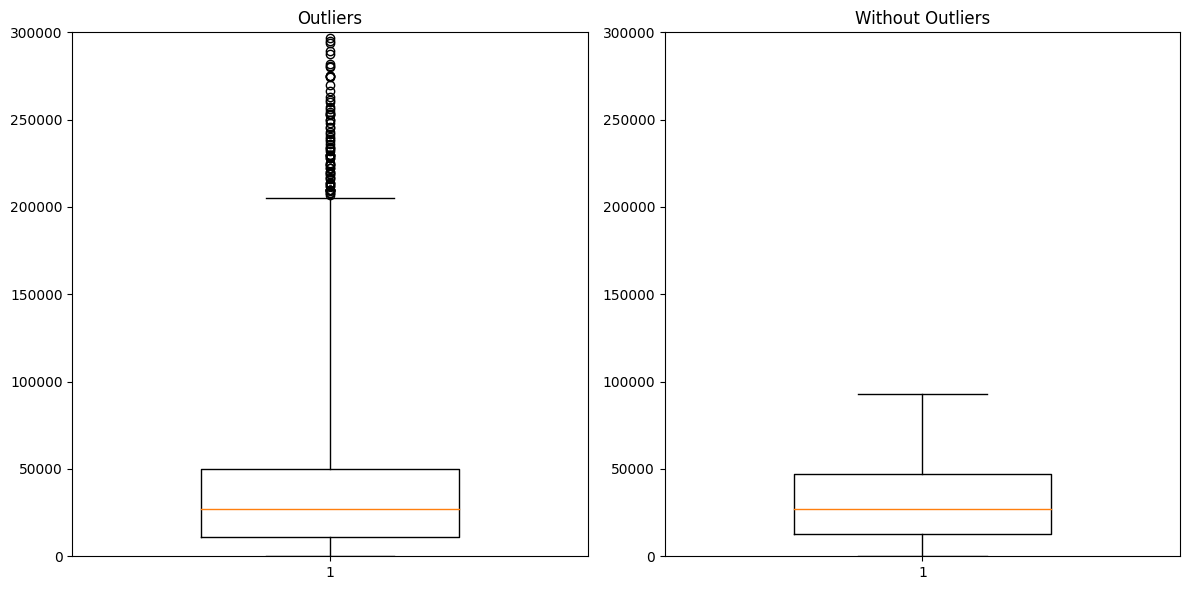

In [ ]:
fig, axs = plt.subplots(1 , 2 ,figsize=(12,6))
axs[0].boxplot(data['mileage'], widths=0.5, whis=4)
axs[0].set_title('Outliers')
axs[0].set_ylim(0,300000)
data_no_outliers = data[data['mileage'].between(data['mileage'].quantile(0.05), data['mileage'].quantile(0.95))]

axs[1].boxplot(data_no_outliers['mileage'], widths=0.5, whis=2)
axs[1].set_title('Without Outliers')
axs[1].set_ylim(0,300000)
plt.tight_layout()
plt.show()

In [ ]:
data = data_no_outliers
data.shape

(304587, 12)

In [ ]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007020778474,7800.0,15,8,86,1063,1,2017.0,14000,13,0,6
3,202007080986776,45000.0,14,4,98,665,1,2016.0,7995,7,0,1
4,202007161321269,64000.0,32,8,52,785,1,2015.0,26995,13,0,1
5,202009304412074,16000.0,15,2,7,817,1,2017.0,29000,4,0,6
6,202007080998445,24075.0,15,17,98,1010,1,2017.0,5861,7,0,6


In [ ]:
data['year_of_registration'] = data['year_of_registration'].astype(int)

<ipython-input-25-3f0fe20c2f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_registration'] = data['year_of_registration'].astype(int)


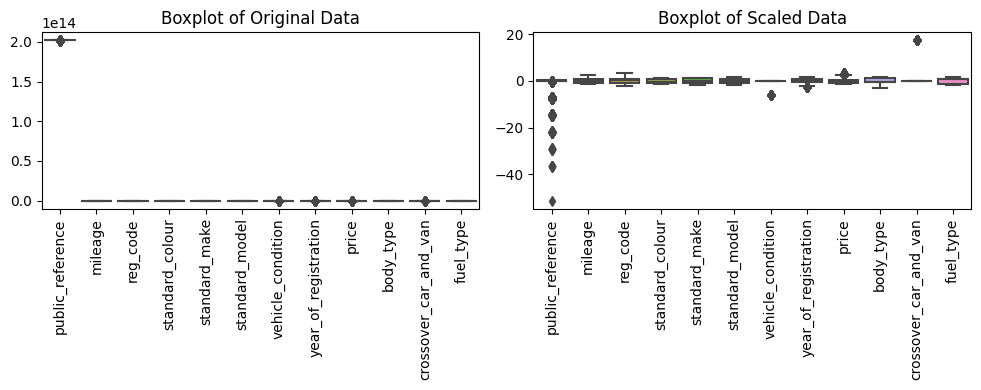

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # Create a subplot for the original data
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Original Data')


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns.tolist())

plt.subplot(1, 2, 2)  # Create a subplot for the rescaled data
sns.boxplot(data=scaled_data)
plt.xticks(rotation=90)
plt.title('Boxplot of Scaled Data')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
data = scaled_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304587 entries, 0 to 304586
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       304587 non-null  float64
 1   mileage                304587 non-null  float64
 2   reg_code               304587 non-null  float64
 3   standard_colour        304587 non-null  float64
 4   standard_make          304587 non-null  float64
 5   standard_model         304587 non-null  float64
 6   vehicle_condition      304587 non-null  float64
 7   year_of_registration   304587 non-null  float64
 8   price                  304587 non-null  float64
 9   body_type              304587 non-null  float64
 10  crossover_car_and_van  304587 non-null  float64
 11  fuel_type              304587 non-null  float64
dtypes: float64(12)
memory usage: 27.9 MB


In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature Engineering

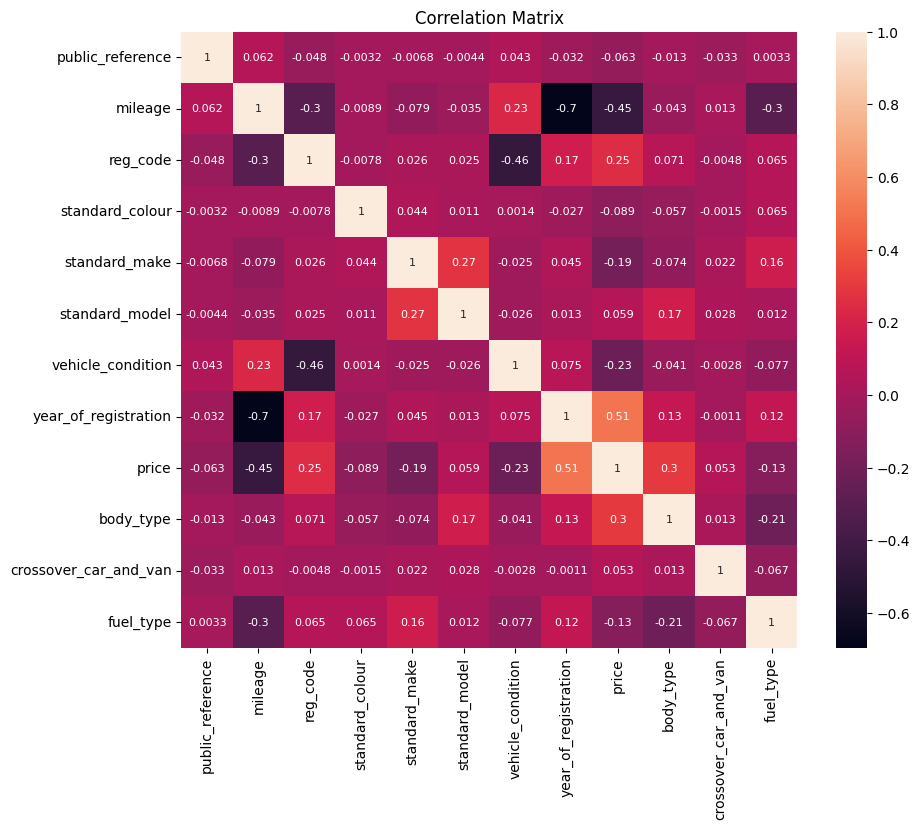

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,  annot_kws={"size": 8}, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_train.columns = X_train.columns.get_level_values(0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194935 entries, 170584 to 286952
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       194935 non-null  float64
 1   mileage                194935 non-null  float64
 2   reg_code               194935 non-null  float64
 3   standard_colour        194935 non-null  float64
 4   standard_make          194935 non-null  float64
 5   standard_model         194935 non-null  float64
 6   vehicle_condition      194935 non-null  float64
 7   year_of_registration   194935 non-null  float64
 8   body_type              194935 non-null  float64
 9   crossover_car_and_van  194935 non-null  float64
 10  fuel_type              194935 non-null  float64
dtypes: float64(11)
memory usage: 17.8 MB


In [ ]:
pp = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False))]
).set_output(transform="pandas")
pipe = Pipeline(steps=[
('pp', pp), 
('est', Ridge())
]).set_output(transform="pandas")

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('poly',
                                  PolynomialFeatures(degree=1,
                                                     include_bias=False,
                                                     interaction_only=True))])),
                ('est', Ridge())])

In [ ]:
X_transform = pipe['pp'].transform(X_train)

In [ ]:
# Transform X_val
X_val_poly = pipe['pp'].transform(X_val)

# Transform X_test
X_test_poly = pipe['pp'].transform(X_test)

In [ ]:
X_val_poly

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
182965,0.044775,-1.079897,-0.625051,1.246161,0.795906,1.072289,0.169095,1.511603,-0.669698,-0.057565,0.791521
95216,0.103266,0.414917,-0.889899,0.991148,-0.032809,0.081440,0.169095,0.339838,-0.669698,-0.057565,0.791521
141890,0.115008,-0.221249,0.610905,1.246161,-1.628852,0.733723,0.169095,-0.831927,1.174787,-0.057565,-1.199272
146697,0.115743,0.076944,0.787470,1.246161,-1.536773,1.637601,0.169095,-0.050750,1.174787,-0.057565,-1.199272
56652,0.107669,0.152021,0.964035,-0.283917,1.164224,-0.869030,0.169095,0.730426,-0.669698,-0.057565,-1.199272
...,...,...,...,...,...,...,...,...,...,...,...
166137,0.105469,-1.024858,-0.889899,0.608629,-0.800137,-1.251081,0.169095,0.339838,-0.669698,-0.057565,0.791521
60664,0.187441,-0.729412,0.875753,1.246161,-0.646672,0.162199,0.169095,0.339838,-0.669698,-0.057565,0.791521
285051,0.109872,-0.637553,0.875753,0.991148,-0.032809,0.081440,0.169095,0.339838,-0.669698,-0.057565,0.791521
151011,0.038172,-0.590038,-0.713334,0.863642,1.164224,0.500765,0.169095,1.121015,1.174787,-0.057565,-1.199272


In [ ]:
X_test_poly

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
246644,0.187439,-0.280516,-0.889899,0.863642,1.194917,0.680919,0.169095,0.339838,-0.669698,-0.057565,0.791521
100630,0.115008,-0.451679,0.610905,-1.048956,0.458281,0.634328,0.169095,-0.831927,-0.054870,-0.057565,-1.199272
185005,0.106204,0.140142,0.699188,-0.411424,1.164224,-0.455917,0.169095,-0.441339,-0.669698,-0.057565,0.791521
269826,0.190373,1.551298,-0.889899,-0.283917,0.795906,1.286611,0.169095,0.339838,-0.977112,-0.057565,-1.199272
298617,0.044041,-0.895883,1.052318,1.246161,-1.536773,1.625177,0.169095,1.121015,1.174787,-0.057565,-1.199272
...,...,...,...,...,...,...,...,...,...,...,...
204050,0.105469,1.056155,0.257775,0.991148,-0.370433,1.224489,0.169095,-2.394281,1.174787,-0.057565,-1.199272
209858,0.042574,-1.170319,1.052318,-1.048956,-1.168455,-0.713724,0.169095,1.121015,1.174787,-0.057565,0.791521
50804,0.112074,-0.240314,-1.331312,0.991148,-0.032809,-0.480766,0.169095,-1.613104,-1.591940,-0.057565,0.791521
270363,0.192573,1.492877,-1.243029,-1.176463,-1.628852,-1.046078,0.169095,-1.222516,-0.669698,-0.057565,-1.199272


In [ ]:
X_transform

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
170584,0.029369,0.975414,-0.889899,0.991148,0.120657,-0.067653,0.169095,0.339838,1.174787,-0.057565,-1.199272
168929,0.180103,-1.163936,0.875753,-1.048956,1.164224,-0.869030,0.169095,0.339838,-0.669698,-0.057565,0.791521
91460,0.119410,0.918134,-0.978181,-1.176463,-1.168455,-0.726149,0.169095,-0.050750,-0.669698,-0.057565,-1.199272
84604,-0.186415,-1.089874,1.052318,-1.176463,-1.536773,-1.487146,0.169095,1.121015,-0.054870,-0.057565,0.791521
54815,-0.120616,-0.210639,-0.889899,-0.283917,-1.628852,0.733723,0.169095,0.339838,1.174787,-0.057565,0.791521
...,...,...,...,...,...,...,...,...,...,...,...
166210,0.172768,-0.452989,0.875753,-0.411424,-0.370433,0.662283,0.169095,0.730426,-0.669698,-0.057565,0.791521
102759,0.117944,0.618292,-0.978181,1.246161,-1.628852,-1.046078,0.169095,-0.050750,-0.669698,-0.057565,0.791521
36933,0.026433,-0.113495,-0.889899,0.863642,-0.462513,1.674875,0.169095,0.339838,1.482201,-0.057565,-1.199272
158510,0.172032,-0.786058,-0.801616,0.863642,1.164224,-0.431068,0.169095,0.730426,1.174787,-0.057565,0.791521


In [ ]:
polypp = pipe.named_steps['pp'].named_steps['poly']
input_features = [f for f in X_train.columns]
interaction_terms = polypp.get_feature_names_out(input_features=input_features)

In [ ]:
X_transform = pd.DataFrame(X_transform, columns=interaction_terms)
X_transform

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
170584,0.029369,0.975414,-0.889899,0.991148,0.120657,-0.067653,0.169095,0.339838,1.174787,-0.057565,-1.199272
168929,0.180103,-1.163936,0.875753,-1.048956,1.164224,-0.869030,0.169095,0.339838,-0.669698,-0.057565,0.791521
91460,0.119410,0.918134,-0.978181,-1.176463,-1.168455,-0.726149,0.169095,-0.050750,-0.669698,-0.057565,-1.199272
84604,-0.186415,-1.089874,1.052318,-1.176463,-1.536773,-1.487146,0.169095,1.121015,-0.054870,-0.057565,0.791521
54815,-0.120616,-0.210639,-0.889899,-0.283917,-1.628852,0.733723,0.169095,0.339838,1.174787,-0.057565,0.791521
...,...,...,...,...,...,...,...,...,...,...,...
166210,0.172768,-0.452989,0.875753,-0.411424,-0.370433,0.662283,0.169095,0.730426,-0.669698,-0.057565,0.791521
102759,0.117944,0.618292,-0.978181,1.246161,-1.628852,-1.046078,0.169095,-0.050750,-0.669698,-0.057565,0.791521
36933,0.026433,-0.113495,-0.889899,0.863642,-0.462513,1.674875,0.169095,0.339838,1.482201,-0.057565,-1.199272
158510,0.172032,-0.786058,-0.801616,0.863642,1.164224,-0.431068,0.169095,0.730426,1.174787,-0.057565,0.791521


In [ ]:
X_val_poly = pd.DataFrame(X_val_poly, columns=interaction_terms)
X_val_poly

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
182965,0.044775,-1.079897,-0.625051,1.246161,0.795906,1.072289,0.169095,1.511603,-0.669698,-0.057565,0.791521
95216,0.103266,0.414917,-0.889899,0.991148,-0.032809,0.081440,0.169095,0.339838,-0.669698,-0.057565,0.791521
141890,0.115008,-0.221249,0.610905,1.246161,-1.628852,0.733723,0.169095,-0.831927,1.174787,-0.057565,-1.199272
146697,0.115743,0.076944,0.787470,1.246161,-1.536773,1.637601,0.169095,-0.050750,1.174787,-0.057565,-1.199272
56652,0.107669,0.152021,0.964035,-0.283917,1.164224,-0.869030,0.169095,0.730426,-0.669698,-0.057565,-1.199272
...,...,...,...,...,...,...,...,...,...,...,...
166137,0.105469,-1.024858,-0.889899,0.608629,-0.800137,-1.251081,0.169095,0.339838,-0.669698,-0.057565,0.791521
60664,0.187441,-0.729412,0.875753,1.246161,-0.646672,0.162199,0.169095,0.339838,-0.669698,-0.057565,0.791521
285051,0.109872,-0.637553,0.875753,0.991148,-0.032809,0.081440,0.169095,0.339838,-0.669698,-0.057565,0.791521
151011,0.038172,-0.590038,-0.713334,0.863642,1.164224,0.500765,0.169095,1.121015,1.174787,-0.057565,-1.199272


In [ ]:
X_test_poly = pd.DataFrame(X_test_poly, columns=interaction_terms)
X_test_poly

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type
246644,0.187439,-0.280516,-0.889899,0.863642,1.194917,0.680919,0.169095,0.339838,-0.669698,-0.057565,0.791521
100630,0.115008,-0.451679,0.610905,-1.048956,0.458281,0.634328,0.169095,-0.831927,-0.054870,-0.057565,-1.199272
185005,0.106204,0.140142,0.699188,-0.411424,1.164224,-0.455917,0.169095,-0.441339,-0.669698,-0.057565,0.791521
269826,0.190373,1.551298,-0.889899,-0.283917,0.795906,1.286611,0.169095,0.339838,-0.977112,-0.057565,-1.199272
298617,0.044041,-0.895883,1.052318,1.246161,-1.536773,1.625177,0.169095,1.121015,1.174787,-0.057565,-1.199272
...,...,...,...,...,...,...,...,...,...,...,...
204050,0.105469,1.056155,0.257775,0.991148,-0.370433,1.224489,0.169095,-2.394281,1.174787,-0.057565,-1.199272
209858,0.042574,-1.170319,1.052318,-1.048956,-1.168455,-0.713724,0.169095,1.121015,1.174787,-0.057565,0.791521
50804,0.112074,-0.240314,-1.331312,0.991148,-0.032809,-0.480766,0.169095,-1.613104,-1.591940,-0.057565,0.791521
270363,0.192573,1.492877,-1.243029,-1.176463,-1.628852,-1.046078,0.169095,-1.222516,-0.669698,-0.057565,-1.199272


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304587 entries, 0 to 304586
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       304587 non-null  float64
 1   mileage                304587 non-null  float64
 2   reg_code               304587 non-null  float64
 3   standard_colour        304587 non-null  float64
 4   standard_make          304587 non-null  float64
 5   standard_model         304587 non-null  float64
 6   vehicle_condition      304587 non-null  float64
 7   year_of_registration   304587 non-null  float64
 8   price                  304587 non-null  float64
 9   body_type              304587 non-null  float64
 10  crossover_car_and_van  304587 non-null  float64
 11  fuel_type              304587 non-null  float64
dtypes: float64(12)
memory usage: 27.9 MB


In [ ]:
# Concatenate the transformed features and target variable
combined_data = pd.concat([X_transform, data['price']], axis=1).dropna()

# Calculate the correlation
correlation = combined_data.corr()


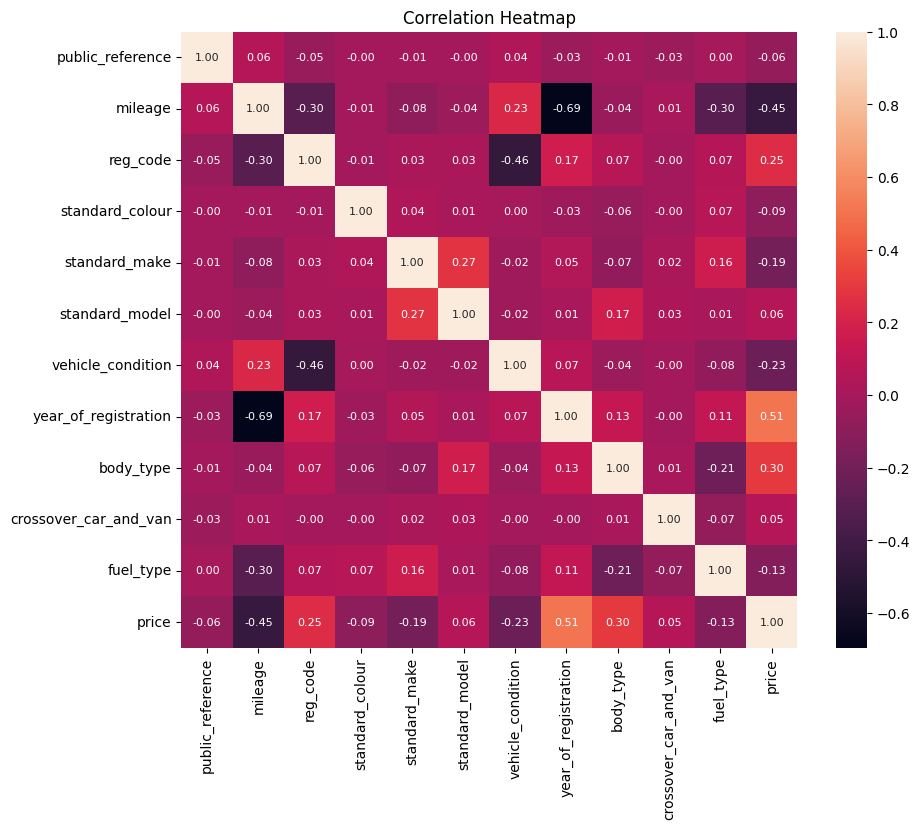

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True,  annot_kws={"size": 8}, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

Selected features :  {'mileage', 'year_of_registration', 'reg_code', 'body_type', 'vehicle_condition'}


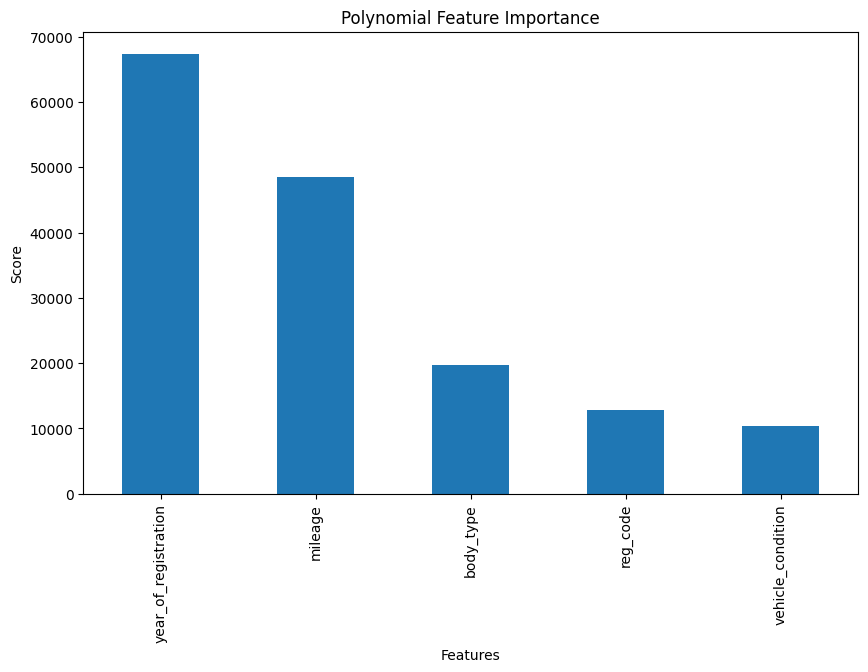

In [ ]:
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features

# Fit the selector to the training data
selector.fit(X_train, y_train)
# Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features =  [interaction_terms[i] for i in selected_features_indices]

# Convert the selected features to a set for efficient lookup
selected_features_set = set(selected_features)
print("Selected features : ",selected_features_set)
# Create a DataFrame from X_train_poly with feature names as columns
X_train_poly_df = pd.DataFrame(X_transform, columns=interaction_terms)

# Subset the training and validation data with the selected features
X_train_poly_selected = X_train_poly_df[X_train_poly_df.columns.intersection(selected_features_set)]

# Create a DataFrame from X_val_poly with feature names as columns
X_val_poly_df = pd.DataFrame(X_val_poly, columns=interaction_terms)

# Subset the validation data with the selected features
X_val_poly_selected = X_val_poly_df[X_val_poly_df.columns.intersection(selected_features_set)]

selected_feature_indices = selector.get_support(indices=True)
poly_feature_importance = pd.Series(selector.scores_[selected_feature_indices], index=np.array(interaction_terms)[selected_feature_indices]).sort_values(ascending=False)


# Plot the feature importance
plt.figure(figsize=(10, 6))
poly_feature_importance.plot(kind='bar')
plt.title('Polynomial Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()


In [ ]:
# Feature Selection and Dimensionality Reduction
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_transform, y_train.values.ravel()) 
selected_feature_indices = selector.get_support(indices=True)
selected_features = np.array(interaction_terms)[selected_feature_indices]
selected_feature_indices 

array([1, 2, 6, 7, 8])

In [ ]:
X_train_selected = X_transform.iloc[:, selected_feature_indices]
X_val_selected = X_val_poly.iloc[:, selected_feature_indices]

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_val_pca = pca.transform(X_val_selected)

In [ ]:
X_val_pca

array([[-1.01496448e+00, -1.42503334e+00],
       [ 6.42552466e-01, -5.61345954e-01],
       [-9.41531071e-02,  4.80880212e-01],
       ...,
       [-8.17832229e-01,  3.28171098e-03],
       [-7.37642222e-01, -1.25299104e+00],
       [ 3.32524777e+00,  9.67801957e-01]])

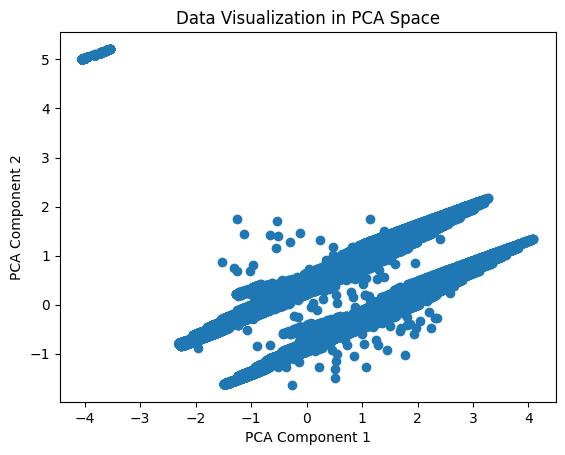

In [ ]:
# Create a scatter plot of the first two PCA components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Visualization in PCA Space')
plt.show()

In [ ]:
# Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train.values.ravel())
linear_predictions = linear_model.predict(X_val_pca)
linear_rmse = mean_squared_error(y_val, linear_predictions, squared=False)

In [ ]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, y_train.values.ravel())
rf_predictions = rf_model.predict(X_val_pca)
rf_rmse = mean_squared_error(y_val, rf_predictions, squared=False)

In [ ]:
# Boosted Tree
boosted_model = GradientBoostingRegressor()
boosted_model.fit(X_train_pca, y_train.values.ravel())
boosted_predictions = boosted_model.predict(X_val_pca)
boosted_rmse = mean_squared_error(y_val, boosted_predictions, squared=False)

## Mean Absolute Error (MAE), Mean Squared Error (MSE) & R squared (R2) values for each model

In [ ]:
# Evaluate the Linear Model 
lin_pred = linear_model.predict(X_val_pca)
lin_mse = mean_squared_error(y_val, lin_pred)
lin_mae = mean_absolute_error(y_val, lin_pred)
r2_lin = r2_score(y_val, lin_pred)

print("Mean Squared Error : ", lin_mse)
print("Mean Absolute Error : ", lin_mae)
print("R Squared : ", r2_lin)



Mean Squared Error :  0.6758956395122326
Mean Absolute Error :  0.6372701123062144
R Squared :  0.3270205570539698


In [ ]:
# Evaluate the RF Model 
rf_pred = rf_model.predict(X_val_pca)
rf_mse = mean_squared_error(y_val, rf_pred)
rf_mae = mean_absolute_error(y_val, rf_pred)
r2_rf = r2_score(y_val, rf_pred)

print("Mean Squared Error : ", rf_mse)
print("Mean Absolute Error : ", rf_mae)
print("R Squared : ", r2_rf)


Mean Squared Error :  0.6296800542410337
Mean Absolute Error :  0.5900520735090145
R Squared :  0.37303674211721627


In [ ]:
# Evaluate the Boosted Tree Model 
boosted_pred = boosted_model.predict(X_val_pca)
boosted_mse = mean_squared_error(y_val, boosted_pred)
boosted_mae = mean_absolute_error(y_val, boosted_pred)
r2_boosted = r2_score(y_val, boosted_pred)

print("Mean Squared Error : ", boosted_mse)
print("Mean Absolute Error : ", boosted_mae)
print("R Squared : ", r2_boosted)


Mean Squared Error :  0.6138646564881695
Mean Absolute Error :  0.6024326109571668
R Squared :  0.388783903287502


## Grid Search for all models

In [ ]:
# reduce the size of dataset for gridsearch 
reduced_size = 0.5

#subset of the training data 
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_pca, y_train, train_size=reduced_size, random_state=42)

In [ ]:
#Linear Model
param_grid = {'fit_intercept': [True, False],
              
              'copy_X': [True, False],
}
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
lin_bs = grid_search.best_score_
print("Best parameters : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_) 

Best parameters :  {'copy_X': True, 'fit_intercept': False}
Best score :  -0.6759179152848726


In [ ]:
# Random Forest Model
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
rf_bs = grid_search.best_score_
print("Best parameters : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_)

Best parameters :  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best score :  -0.6019649245130088


In [ ]:
# Gradient Boosting Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3,4,5],
    'learning_rate' : [0.01,0.1,1]
}

grid_search = GridSearchCV(boosted_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train_reduced)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
gb_bs = grid_search.best_score_
print("Best parameters : ",grid_search.best_params_)
print("Best score : ",grid_search.best_score_)

Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score :  -0.6064378372380708


<Axes: >

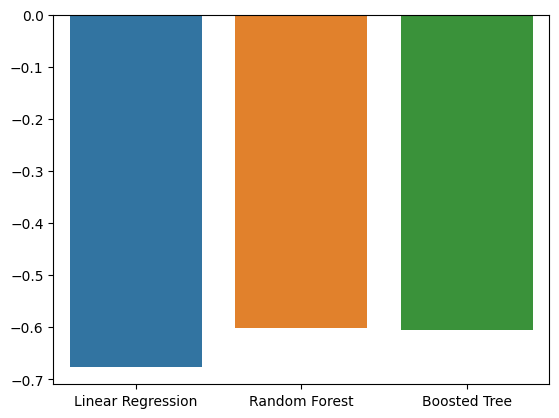

In [ ]:
grid_search_scores = {'Models':['Linear Regression', 'Random Forest', 'Boosted Tree'], 
                      'Best Scores' : [lin_bs, rf_bs, gb_bs]}
sns.barplot(grid_search_scores, x='Models', y='Best Scores')

## Voting Regressor 

In [ ]:
# Ensemble (VotingRegressor)
ensemble_model = VotingRegressor([('linear', linear_model), ('random_forest', rf_model), ('boosted_tree', boosted_model)])
ensemble_model.fit(X_train_pca, y_train.values.ravel())
ensemble_predictions = ensemble_model.predict(X_val_pca)
ensemble_rmse = mean_squared_error(y_val, ensemble_predictions, squared=False)

In [ ]:
xt = X_val_pca[:20]
pred1 = linear_model.predict(xt)
pred2 = rf_model.predict(xt)
pred3 = boosted_model.predict(xt)
pred4 = ensemble_model.predict(xt)

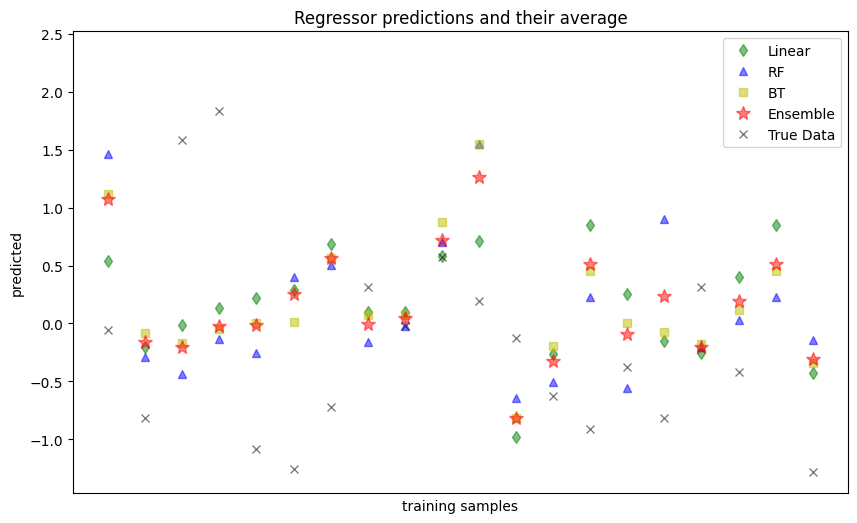

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="Linear")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred3, "ys", alpha=0.5, label="BT")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

## Cross Validation Scores for each model

In [ ]:
linear_scores = cross_val_score(linear_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
linear_rmse_cv = np.sqrt(-linear_scores.mean())

In [ ]:
rf_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_cv = np.sqrt(-rf_scores.mean())

In [ ]:
boosted_scores = cross_val_score(boosted_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
boosted_rmse_cv = np.sqrt(-boosted_scores.mean())

In [ ]:
ensemble_scores = cross_val_score(ensemble_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
ensemble_rmse_cv = np.sqrt(-ensemble_scores.mean())

In [ ]:
# Compare the RMSE scores
print("Linear Model RMSE:", linear_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Boosted Tree RMSE:", boosted_rmse)
print("Ensemble RMSE:", ensemble_rmse)
print("-------------------------------")
print("Linear Model RMSE (CV):", linear_rmse_cv)
print("Random Forest RMSE (CV):", rf_rmse_cv)
print("Boosted Tree RMSE (CV):", boosted_rmse_cv)
print("Ensemble RMSE (CV):", ensemble_rmse_cv)

Linear Model RMSE: 0.8221287244174312
Random Forest RMSE: 0.7935238208403285
Boosted Tree RMSE: 0.7834951540936098
Ensemble RMSE: 0.7588736624582312
-------------------------------
Linear Model RMSE (CV): 0.8221177357278734
Random Forest RMSE (CV): 0.7960259453035635
Boosted Tree RMSE (CV): 0.7851573754587586
Ensemble RMSE (CV): 0.7613698362944624


In [ ]:
rmse_scores = {
    "Linear Model" : linear_rmse,
    "Random Forest" : rf_rmse, 
    "Boosted Tree" : boosted_rmse, 
    "Ensemble" : ensemble_rmse
}

best_model = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_model]

print("Best model : ", best_model)
print("Best RMSE : ", best_rmse)

Best model :  Ensemble
Best RMSE :  0.7588736624582312


True vs Predicted Analysis

MSE : 0.68  MAE : 0.64 R2 : 0.33


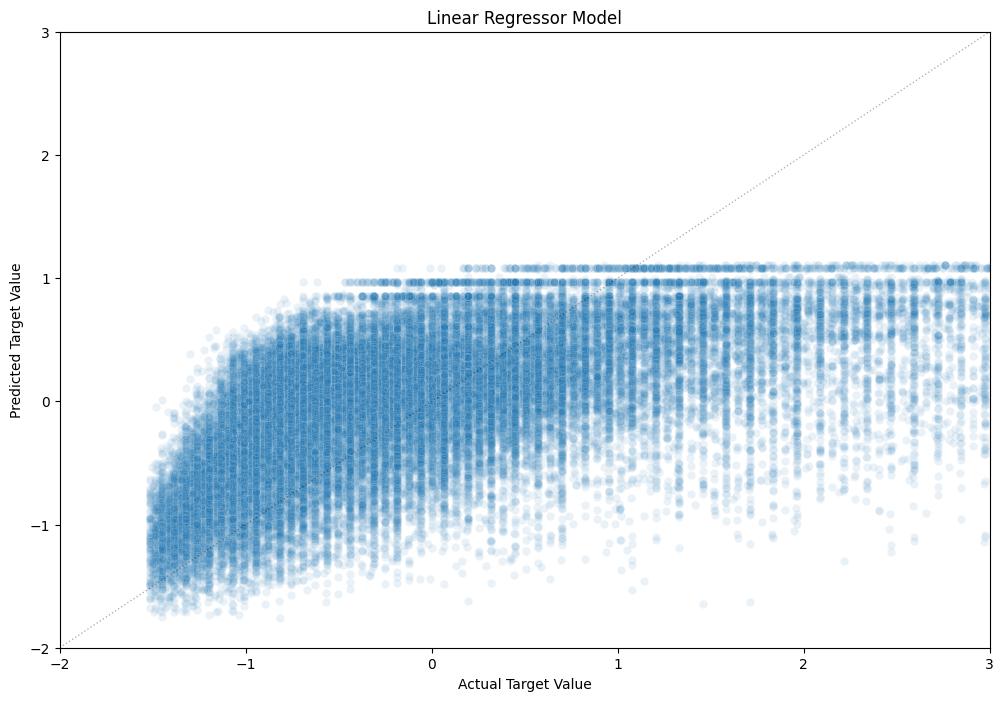

In [77]:
plt.figure(figsize=(12, 8))

# Linear Model
print("MSE : {:.2f}  MAE : {:.2f} R2 : {:.2f}".format(lin_mse,lin_mae,r2_lin))
ax1 = sns.scatterplot(x=y_val, y=lin_pred, alpha=0.09)
ax1.set_xlabel('Actual Target Value')
ax1.set_ylabel('Predicted Target Value')
plt.title("Linear Regressor Model")
ax1.set_xlim(-2,3)
ax1.set_ylim(-2, 3)
ax1.plot((-2,3), (-2,3), ':k', alpha=0.3, lw=1)


MSE : 0.63  MAE : 0.59 R2 : 0.37


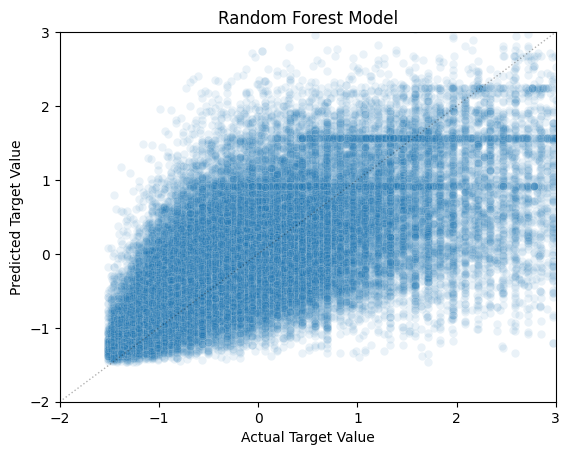

In [78]:
# Random Forest Model
print("MSE : {:.2f}  MAE : {:.2f} R2 : {:.2f}".format(rf_mse,rf_mae,r2_rf))
ax1 = sns.scatterplot(x=y_val, y=rf_pred, alpha=0.09)
ax1.set_xlabel('Actual Target Value')
ax1.set_ylabel('Predicted Target Value')
plt.title('Random Forest Model')
ax1.set_xlim(-2,3)
ax1.set_ylim(-2, 3)
ax1.plot((-2,3), (-2,3), ':k', alpha=0.3, lw=1)

MSE : 0.61  MAE : 0.60 R2 : 0.39


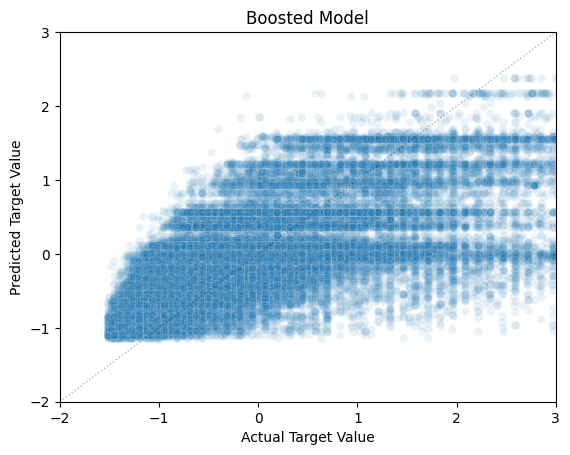

In [79]:
# Boosted Model
print("MSE : {:.2f}  MAE : {:.2f} R2 : {:.2f}".format(boosted_mse,boosted_mae,r2_boosted))
ax1 = sns.scatterplot(x=y_val, y=boosted_pred, alpha=0.09)
ax1.set_xlabel('Actual Target Value')
ax1.set_ylabel('Predicted Target Value')
plt.title('Boosted Model')
ax1.set_xlim(-2,3)
ax1.set_ylim(-2, 3)
ax1.plot((-2,3), (-2,3), ':k', alpha=0.3, lw=1)

## SHAP Analysis for Boosted Tree Model

In [80]:
!pip install -q shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.0 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


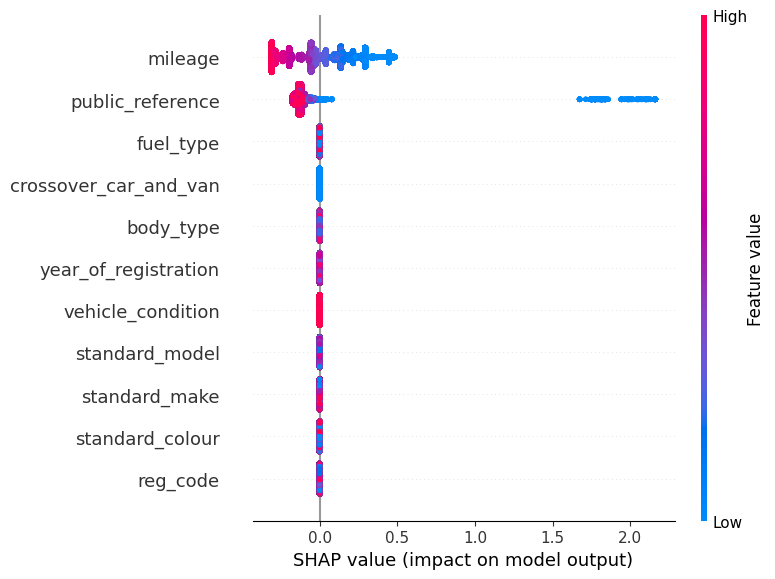

In [81]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(boosted_model)

# Generate SHAP values for the validation data
shap_values = explainer.shap_values(X_val)

# Visualize the global feature importance
shap.summary_plot(shap_values, X_val)



## SHAP Analysis for Random Forest Model

Computationally expensive

In [ ]:

# Create a SHAP explainer for the ensemble model
explainer = shap.Explainer(rf_model)

# Generate SHAP values for the validation data
shap_values = explainer.shap_values(X_val)

# Visualize the global feature importance
shap.summary_plot(shap_values, X_val)

## Partial Dependence for Ensemble

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
PartialDependenceDisplay.from_estimator(
    ensemble_model, X_test, features=['vehicle_condition'], kind='both' 
);

In [ ]:
PartialDependenceDisplay.from_estimator(
    ensemble_model, X_test, features=['body_type'], kind='both' 
);

In [ ]:
PartialDependenceDisplay.from_estimator(
    ensemble_model, X_test, features=['reg_code'], kind='both' 
);

## Partial Dependence for Linear Regressor **Model**

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    linear_model, X_test, features = X_test, 
    kind = 'average', subsample=100, 
    grid_resolution = 30, n_jobs=2, 
    random_state = 0, ax=ax, n_cols=3
);

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_model, X_test, features = X_test, 
    kind = 'average', subsample=100, 
    grid_resolution = 30, n_jobs=2, 
    random_state = 0, ax=ax, n_cols=3
);

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    boosted_model, X_test, features = X_test, 
    kind = 'average', subsample=100, 
    grid_resolution = 30, n_jobs=2, 
    random_state = 0, ax=ax, n_cols=3
);